# Movie Reccomendation system with Singular Value Decomposition SVD Technique  

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import decomposition as dec
from sklearn import manifold as man

In [ ]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.shape

(100836, 4)

In [ ]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(9742, 3)

In [ ]:
merged = ratings.merge(movies, how="left", on="movieId")
merged.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Clear duplicates in merged file

In [ ]:
merged.duplicated(subset=["userId", "title"]).sum()

4

In [ ]:
merged.drop_duplicates(subset=["userId", "title"], inplace=True)

Create a pivot table

In [ ]:
U_matrix = merged.pivot("userId", "title", "rating")
U_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
U_matrix.shape

(610, 9719)

Normalize that pivot table with each users's overall means. There we calculate overalls of given points by each user then we subtract that from their given movie ratings(from each row). That will helps us to evaluate/interpret their ratings more meaningful  

In [ ]:
U_matrix_norm = U_matrix - U_matrix.mean(axis=1).values.reshape(-1,1)
U_matrix_norm.fillna(0, inplace=True)
U_matrix_norm.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.366379,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.948276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.444444,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Split data into Train and Test Sets

In [ ]:
m = 500
train = U_matrix_norm[:m]
test = U_matrix_norm[m:]

Subtract each columns mean from every cells which are existing in related column. That will scale our data set. Our data will be located to origin in plane

In [ ]:
train_mean = train.mean(axis=0)
centered_train = train - train_mean
centered_train.shape

(500, 9719)

First lets call SVD function from numpy. But we should calculate the transpose of our matrix. Numpy has a different structure 

In [ ]:
U, S, VT = np.linalg.svd(centered_train.T, full_matrices=False)

In [ ]:
print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)
print("train shape:", centered_train.shape)

U shape: (9719, 500)
S shape: (500,)
VT shape: (500, 500)
train shape: (500, 9719)


Calculate the energy in Singular Value matrix. According to energy, we will decrease our matrix. There should be 80-90% in scaled down matrix 

In [ ]:
np.set_printoptions(suppress=True)

squares = np.array(list(map(lambda x:x**2, S)))
total = squares.sum()

for i in range(1, len(squares)):
  r = squares[:i].sum() / total
  print(i, r)

# select 200 concepts
#Lets take 200

In [ ]:
k = 200

U = U[:, :k]
S = S[:k]
VT = VT[:k, :]

print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)
print("train shape:", centered_train.shape)

U shape: (9719, 200)
S shape: (200,)
VT shape: (200, 500)
train shape: (500, 9719)


In [ ]:
svd = dec.TruncatedSVD(n_components=200)
temp = svd.fit_transform(centered_train)
temp.shape

(500, 200)

In [ ]:
temp[:2]

array([[ 0.57074555, -0.21504601,  0.27344645,  0.11543492, -0.71663663,
        -0.08299948, -0.07076581, -0.76213075,  0.41288347,  0.26179066,
        -0.01449185, -0.44499346, -0.34394919,  0.39673734, -0.3230593 ,
        -0.27125702, -0.24908379,  0.00363267,  1.02940816,  0.10251655,
         0.78169409, -0.39587511, -0.21781911,  0.61501999, -0.10295869,
         0.75686431,  0.32395074,  0.1846061 , -0.16547368, -0.62527804,
         0.57388081,  0.24910742, -0.0783167 ,  0.05185848,  0.91593433,
         0.94739166, -0.3227652 ,  1.03037532,  0.2673073 ,  1.04178651,
         1.47625129, -0.22304004,  0.6346847 ,  0.98684096,  0.59449971,
         0.1161411 ,  0.39276471, -0.41490622, -0.16841949,  0.01835791,
         0.58121975, -1.69169524, -0.00052295, -0.42210848,  0.94459115,
         0.42705257,  0.21704133, -0.31855789,  1.40991228, -0.25296837,
         0.46578637, -1.07187026, -0.38418667,  0.26570882, -0.06019939,
         0.40552351, -0.94366492,  0.38057535,  0.4

In [ ]:
np.diag(S).dot(VT).T

array([[ 0.57074555, -0.21504601,  0.27344643, ...,  0.75112309,
        -1.03757866, -0.30229992],
       [-1.28969309,  0.15446462,  0.42839293, ...,  0.12016796,
        -0.06387341, -0.07459993],
       [-1.54863889,  0.19796651,  0.70460346, ...,  0.144879  ,
         0.02355699, -0.23613682],
       ...,
       [-1.02270159, -0.07603179,  0.56041032, ..., -0.26531351,
         0.04419691,  0.19207322],
       [-1.01966977,  0.11201587,  0.50960161, ..., -0.39541146,
        -0.10796739, -0.25570305],
       [-0.43453607,  0.16881736,  0.30355879, ..., -0.13920832,
        -0.15531719, -0.07086652]])

In [ ]:
svd.components_[:2]

array([[ 0.        ,  0.00009187,  0.000032  , ..., -0.004328  ,
        -0.00674239,  0.        ],
       [-0.        , -0.00002368,  0.00004144, ..., -0.00370944,
         0.01506011, -0.        ]])

In [ ]:
U.T[:2]

array([[-0.        ,  0.00009187,  0.000032  , ..., -0.004328  ,
        -0.00674239,  0.        ],
       [ 0.        , -0.00002368,  0.00004144, ..., -0.00370944,
         0.01506011,  0.        ]])

In [ ]:
U.shape

(9719, 200)

In [ ]:
tsne = man.TSNE(n_components=2)
movies_red = tsne.fit_transform(U[:100, :])
movies_red.shape

(100, 2)

In [ ]:
movieNames_100 = train.columns[:100]

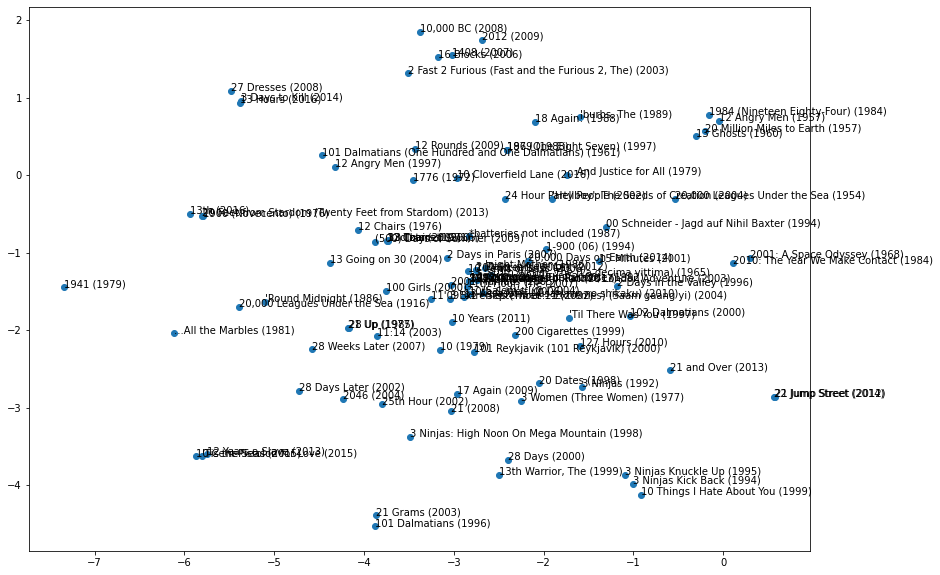

In [ ]:
plt.figure(figsize=(14, 10))
plt.scatter(movies_red[:, 0], movies_red[:, 1])

for i in range(len(movieNames_100)):
  plt.annotate(movieNames_100[i], xy=(movies_red[i][0], movies_red[i][1]))

plt.show()

I Will calculate Cosine similarity:

In [ ]:
a / np.linalg.norm(a, axis=1).reshape(-1,1)

array([[ 0.26726124, -0.53452248,  0.80178373],
       [ 0.9701425 , -0.24253563,  0.        ]])

In [ ]:
U_norm = U / np.linalg.norm(U, axis=1).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
U_norm

array([[-0.00786455,  0.00128707,  0.00336417, ..., -0.04799219,
        -0.05728052, -0.02872246],
       [ 0.00280732, -0.00072355, -0.00591823, ..., -0.01658565,
         0.04349955, -0.01589265],
       [ 0.0008245 ,  0.00106765, -0.00157836, ..., -0.06720476,
         0.08126745,  0.01041647],
       ...,
       [-0.02469632, -0.0211667 ,  0.04340879, ..., -0.05401242,
         0.09011181, -0.02666815],
       [-0.0254346 ,  0.05681182,  0.00938655, ..., -0.00719882,
         0.01471821, -0.14047388],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [ ]:
sims = U_norm.dot(U_norm.T)
sims.shape

(9719, 9719)

In [ ]:
sims[:3, :]

array([[ 1.        , -0.06886351, -0.0326851 , ..., -0.04044224,
        -0.04514528,         nan],
       [-0.06886351,  1.        , -0.21457537, ...,  0.01395765,
        -0.03456391,         nan],
       [-0.0326851 , -0.21457537,  1.        , ..., -0.02983554,
        -0.01322777,         nan]])

Clear nan values with -1


In [ ]:
a = np.isnan(sims)
sims[a] = -1
sims[:3]

array([[ 1.        , -0.06886351, -0.0326851 , ..., -0.04044224,
        -0.04514528, -1.        ],
       [-0.06886351,  1.        , -0.21457537, ...,  0.01395765,
        -0.03456391, -1.        ],
       [-0.0326851 , -0.21457537,  1.        , ..., -0.02983554,
        -0.01322777, -1.        ]])

Most voted 10 movies:

In [ ]:
merged.title.value_counts()[:10]

Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: title, dtype: int64

In [ ]:
movieNames = np.array(train.columns)

Reccommend 20 movies to user who watched Matrix:

In [ ]:
movieID = list(train.columns).index("Matrix, The (1999)")
simIndices = sims[movieID].argsort()[::-1][:50]
simMovies = movieNames[simIndices]
simMovies

array(['Matrix, The (1999)', 'Angel Baby (1995)', 'Cage Dive (2017)',
       'The Nut Job 2: Nutty by Nature (2017)', 'English Vinglish (2012)',
       'Tootsie (1982)', 'Cocoanuts, The (1929)',
       'Adventures in Plymptoons! (2011)', 'Pet Sematary II (1992)',
       'Sky Captain and the World of Tomorrow (2004)',
       'Dick Tracy (1990)', 'Bringing Down the House (2003)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Hook (1991)', 'Who Framed Roger Rabbit? (1988)',
       'Batman vs. Robin (2015)', 'It (1990)', 'Comandante (2003)',
       'Haunting, The (1999)', 'Away from Her (2006)',
       'Addams Family Values (1993)', 'How Do You Know (2010)',
       'Robin and Marian (1976)', 'Sarafina! (1992)',
       'In Like Flint (1967)',
       'In the Mood For Love (Fa yeung nin wa) (2000)',
       'Tommy Boy (1995)', 'Lolita (1997)', 'Becoming Jane (2007)',
       'Grumpy Old Men (1993)', 'Dogville (2003)',
       "St Trinian's 2: The Legend of Fritton's Gol

Lets reccommend movies to a user

In [ ]:
new_user = test.loc[501:501, :]
new_user

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_mean[:5]

title
'71 (2014)                                 0.000000
'Hellboy': The Seeds of Creation (2004)    0.000801
'Round Midnight (1986)                    -0.001023
'Salem's Lot (2004)                        0.002194
'Til There Was You (1997)                  0.000900
dtype: float64

Normalize user

In [ ]:
new_user_centered = new_user - train_mean
new_user_centered

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
501,0.0,-0.000801,0.001023,-0.002194,-0.0009,0.003521,0.010815,0.000798,-0.014177,-0.000688,0.003824,0.000681,-0.001536,-0.001292,0.000258,0.007216,0.000478,0.000501,-0.010645,-0.001305,0.024824,0.001481,0.000695,0.038162,0.005946,0.0,0.000679,0.009985,-0.002154,0.0,-0.000176,-0.001202,-0.002181,-0.001154,-0.050627,-0.003249,-0.000767,-0.001767,0.003343,0.000062,...,0.001032,0.000233,0.0,0.000472,0.005384,-0.001488,-0.002488,0.000652,-0.001202,-0.004264,-0.01168,-0.014689,0.002207,0.0,0.0,0.001695,-0.007306,0.002695,-0.002737,0.005469,-0.014677,0.0,0.001545,0.000511,0.005966,0.005105,0.0,0.000695,-0.006983,-0.003795,0.002695,-0.003997,-0.000047,0.001346,0.00141,-0.004605,0.032201,0.010282,0.015661,0.0


Transform user to SVD 

In [ ]:
new_user_red = svd.transform(new_user_centered)
new_user_red.shape

(1, 200)

User's voted movies:

In [ ]:
for c in test.columns:
  if test.loc[501, c] != 0:
    print(c)

American President, The (1995)
Aristocats, The (1970)
Birdcage, The (1996)
Broken Arrow (1996)
Casino (1995)
Courage Under Fire (1996)
Cutthroat Island (1995)
Dead Man Walking (1995)
Down Periscope (1996)
Escape from L.A. (1996)
Executive Decision (1996)
Eye for an Eye (1996)
Father of the Bride Part II (1995)
Fear (1996)
Four Rooms (1995)
Get Shorty (1995)
GoldenEye (1995)
Grumpier Old Men (1995)
Heat (1995)
Heavy Metal (1981)
Independence Day (a.k.a. ID4) (1996)
James and the Giant Peach (1996)
Jumanji (1995)
Leaving Las Vegas (1995)
Misérables, Les (1995)
Money Train (1995)
Mr. Holland's Opus (1995)
Mulholland Falls (1996)
Now and Then (1995)
Oliver & Company (1988)
Primal Fear (1996)
Rumble in the Bronx (Hont faan kui) (1995)
Sabrina (1995)
Sense and Sensibility (1995)
Sgt. Bilko (1996)
Striptease (1996)
Time to Kill, A (1996)
To Die For (1995)
Tom and Huck (1995)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Twister (1996)
Unforgettable (1996)
Usual Suspects, The (1995)
Vampire in Bro

In [ ]:
test.loc[501, "Casino (1995)"]

-0.20000000000000018

In [ ]:
list(test.columns).index("Casino (1995)")

1598

In [ ]:
svd.components_.T[1598].shape

(200,)

In [ ]:
new_user_red.shape

(1, 200)

In [ ]:
new_user_red.dot(svd.components_.T[1598])

array([-0.0605037])